# Comparing Country GDP to Life Expectancy at Birth

## Introduction

This project will investigate a Countries economic output against the life expectancy of the citizens. 

We will need to prepare the data and complete some analysis before explaining our findings.

###### We will aim to investigate the following questions;
* How has GDP and life expectancy changed over time?
* What is the average life expectancy and GDP for each Country and how does this compare?
* Is there any correlations between GDP and life expectancy?
* What are the distributions of GDP and life expectancy?

### Inserting libraries needed

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Viewing the data 
*After reading in the data, we can have a look at the first 5 lines to start to understand what data we are working with.*

In [2]:
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


*We will also see if there are any missing values within the data.*

In [3]:
data.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

Looking at the column names, there are four columns, three of which have simple, one-word titles and one column with a long title. To make it easier for our codes, let's shorten this from 'Life expectancy at birth (years)' to 'LEAB'.

In [4]:
data = data.rename({'Life expectancy at birth (years)': 'LEAB'}, axis = 'columns')
data.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## What will we be investigating?
*To begin thinking about what we may want to investigate about the data, let's look at what data we have*

There are six Countries in the data set covering year 2000 to 2015.

In [5]:
print('There are', data.Country.nunique(), 'Countries in the dataset.')
print('Countries included in the dataset are', data.Country.unique())
print('There are', data.Year.nunique(), 'years covered by the data.')
print('These years are', data.Year.unique())

There are 6 Countries in the dataset.
Countries included in the dataset are ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
There are 16 years covered by the data.
These years are [2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


The two main columns that we will be looking into are the Life expectancy at birth column which is the year average expected life expectancy from when the citizens were born. And, the gross domestic product (GDP) in trillions of US dollars. 

## Looking further into GDP and Life expectancy per Country

Before we can begin, we need to create subsets of our dataframe of the data for each country.

In [6]:
Chile = data[data['Country'] == 'Chile'].reset_index()
China = data[data['Country'] == 'China'].reset_index()
Germany = data[data['Country'] == 'Germany'].reset_index()
Mexico = data[data['Country'] == 'Mexico'].reset_index()
USA = data[data['Country'] == 'United States of America'].reset_index()
Zimbabwe = data[data['Country'] == 'Zimbabwe'].reset_index()

Firstly, let's look at the average per Country of GDP and life expectancy.

In [7]:
averages = data.drop('Year', axis = 1).groupby('Country').mean()
averages

,LEAB,GDP
Country,,
Chile,78.94375,1.697888e+11
China,74.26250,4.957714e+12
Germany,79.65625,3.094776e+12
Mexico,75.71875,9.766506e+11
United States of America,78.06250,1.407500e+13
Zimbabwe,50.09375,9.062580e+09


Comparing this to the average for all the countries.

In [8]:
print('The total average life expectancy at birth is', round(data['LEAB'].mean(), 2), 'years and the average GDP is', data.GDP.mean())

The total average life expectancy at birth is 72.79 years and the average GDP is 3880498570768.396


From the above, we can see that, Zimbabwe has the lowest average life expectancy, around 22 years below the average across all the countries. Glancing at the other values, it is clear that this is by far the lowest of the countries, 24.17 years below the next average life expectancy value. Germany has the highest life expectancy, around 7 years above the total average but only 0.72 years above the next highest value. Furthermore, all average country life expectancy is between ~74 years to ~80 except Zimbabwe at ~50 years. 

The GDP averages are difficult to read as they are so big, but we can see that, USA has the highest average GDP. Also, Zimbabwe has the lowest average GDP.

Now let's look at the range of values for each Country for GDP and life expectancy.

In [9]:
data.groupby('Country').agg({'LEAB' : ['count', 'min', 'max'], 'GDP' : ['min', 'max']})

LEAB                       GDP              
                         count   min   max           min           max
Country                                                               
Chile                       16  77.3  80.5  6.973681e+10  2.783840e+11
China                       16  71.7  76.1  1.211350e+12  1.106470e+13
Germany                     16  78.0  81.0  1.949950e+12  3.890610e+12
Mexico                      16  74.8  76.7  6.836480e+11  1.298460e+12
United States of America    16  76.8  79.3  1.030000e+13  1.810000e+13
Zimbabwe                    16  44.3  60.7  4.415703e+09  1.630467e+10

From this table, it tells us that for each country, we have only 16 samples, one sample per year. The values for Zimbabwe are significantly lower than the other countries. 

### Understanding our Data

To understand the distributions of our data more, let's create some boxplots.

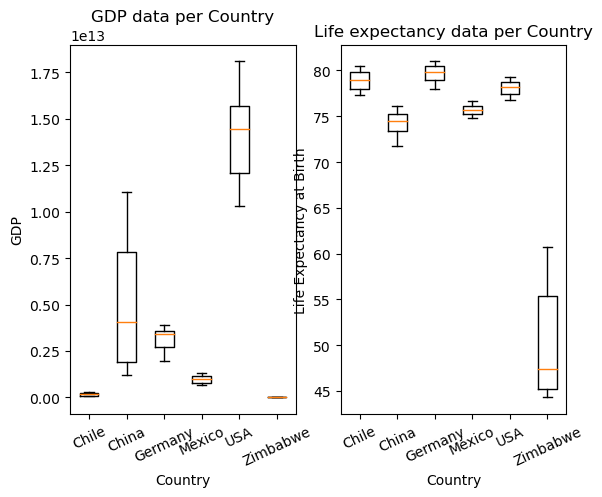

<Figure size 640x480 with 0 Axes>

In [10]:
plotting_data = [Chile.GDP, China.GDP, Germany.GDP, Mexico.GDP, USA.GDP, Zimbabwe.GDP]
plotting_datal = [Chile['LEAB'], China['LEAB'], Germany['LEAB'], Mexico['LEAB'], USA['LEAB'], Zimbabwe['LEAB']]
Countries = list(data.Country.unique())
Countries[4] = 'USA'

figure, (ax1, ax2) = plt.subplots(1,2)
ax1.boxplot(plotting_data)
ax1.set_title('GDP data per Country')
ax1.set_ylabel('GDP')
ax1.set_xlabel('Country')
ax1.set_xticklabels(Countries, rotation=25)

ax2.boxplot(plotting_datal)

ax2.set_title('Life expectancy data per Country')
ax2.set_ylabel('Life Expectancy at Birth')
ax2.set_xlabel('Country')
ax2.set_xticklabels(Countries, rotation=25)
plt.show()
plt.clf()

Looking at these boxplots, it is clear that Zimbabwe stands out as having much lower values, particularly for life expectancy. However it has the greatest spread of life expectancy values. We can also see that the USA has the largest values particularly for GDP but China has the greatest spread of GDP values. Since the values of GDP spread across such a large range, it is difficult to compare the lower values of GDP.

From our initial investigations Zimbabwe has the lowest average values in both categories, lets create a scatter plot to begin to understand if there is a correlation between GDP and life expectancy across all six nations.

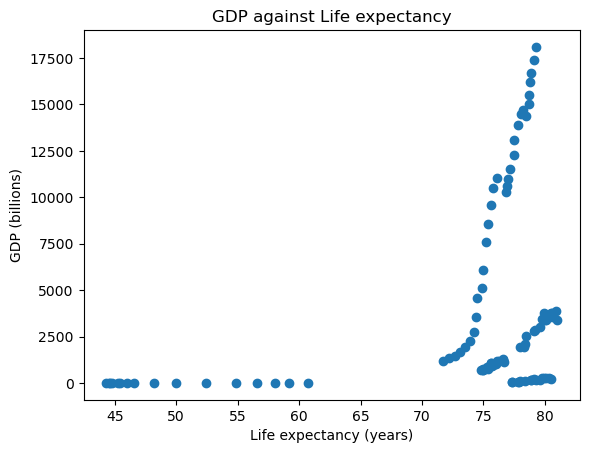

<Figure size 640x480 with 0 Axes>

In [11]:
plt.scatter(data['LEAB'], (data['GDP']/1000000000))
plt.title('GDP against Life expectancy')
plt.ylabel('GDP (billions)')
plt.xlabel('Life expectancy (years)')
plt.show()
plt.clf()

This Scatter plot is not clear enough to be able to say that there is a corrolation between GDP and life expectancy.
We can investigate further by calculating the correlation coefficient.

Firstly, let's look into each country deeper.

## Investigating the individual Countries

Let's plot to see if life expectancy and GDP has changed over the years and against each other for each Country.

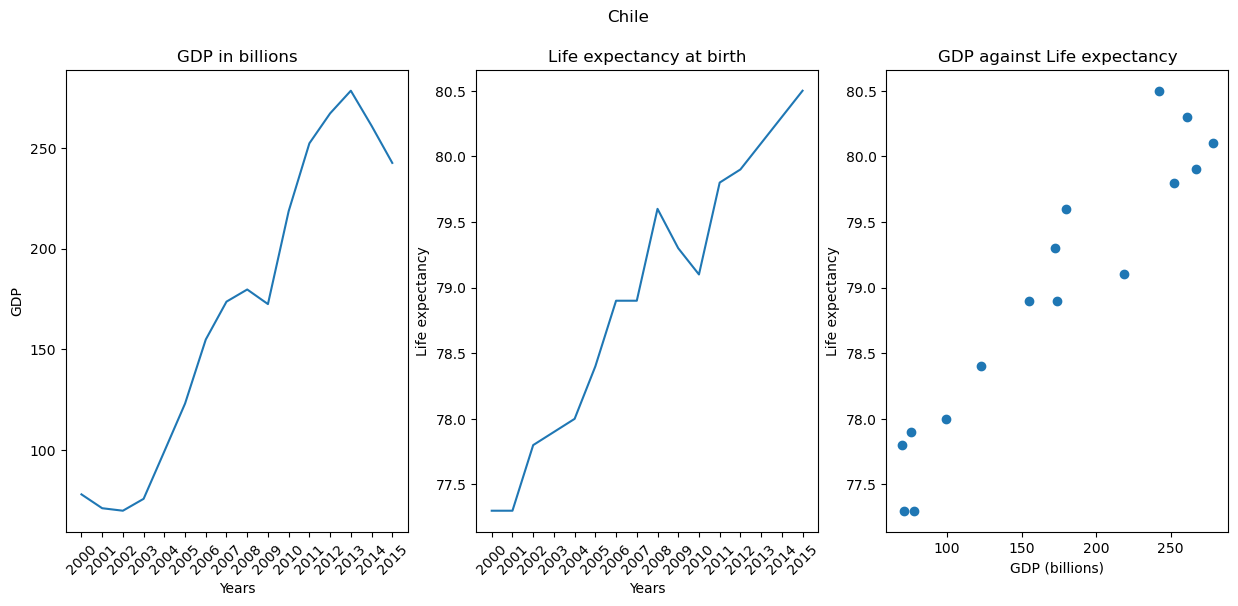

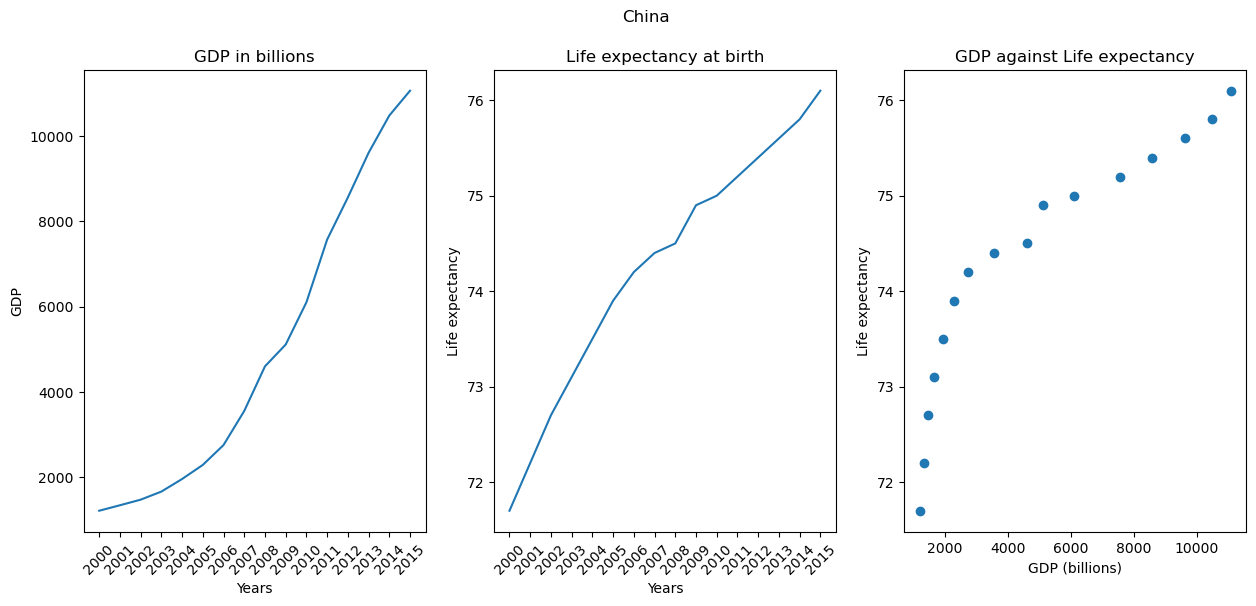

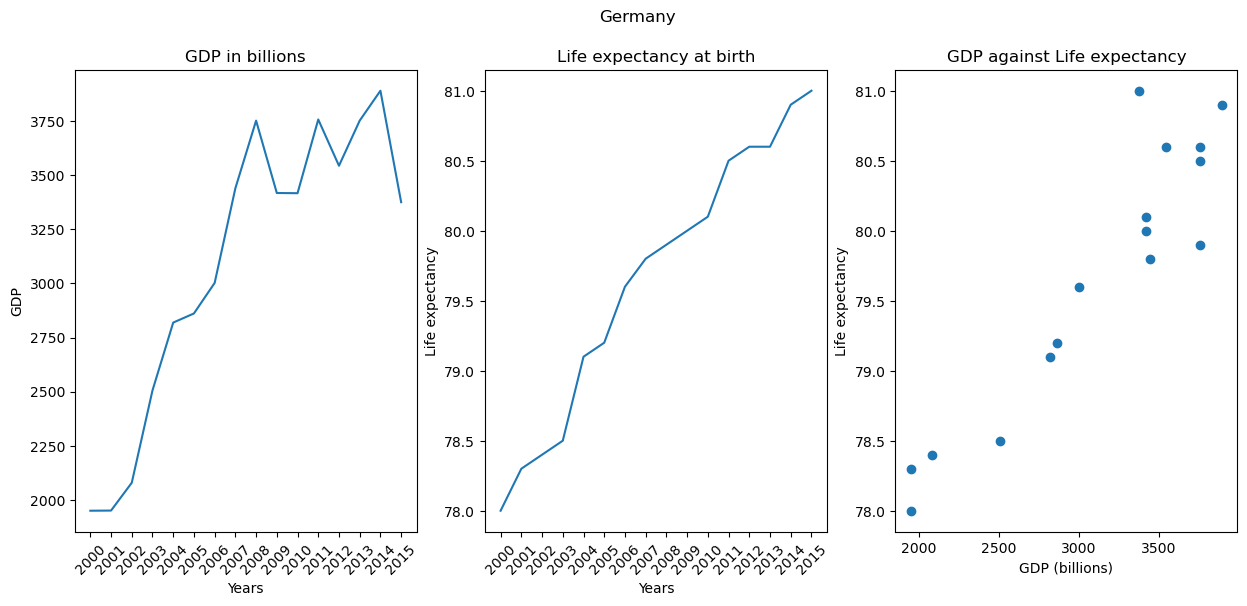

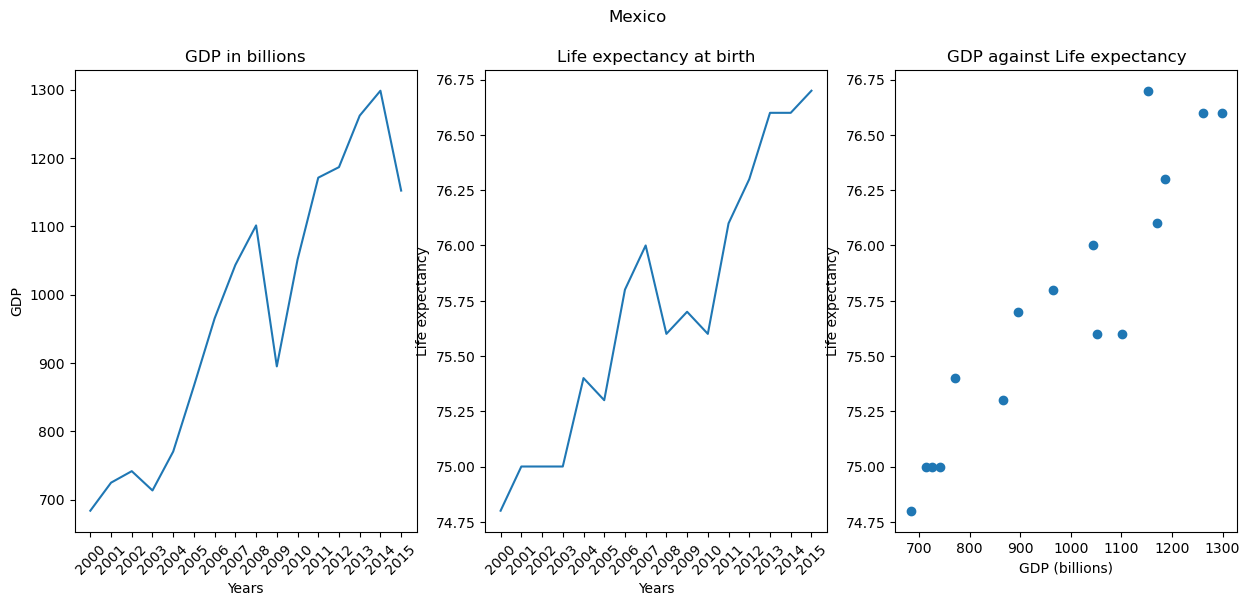

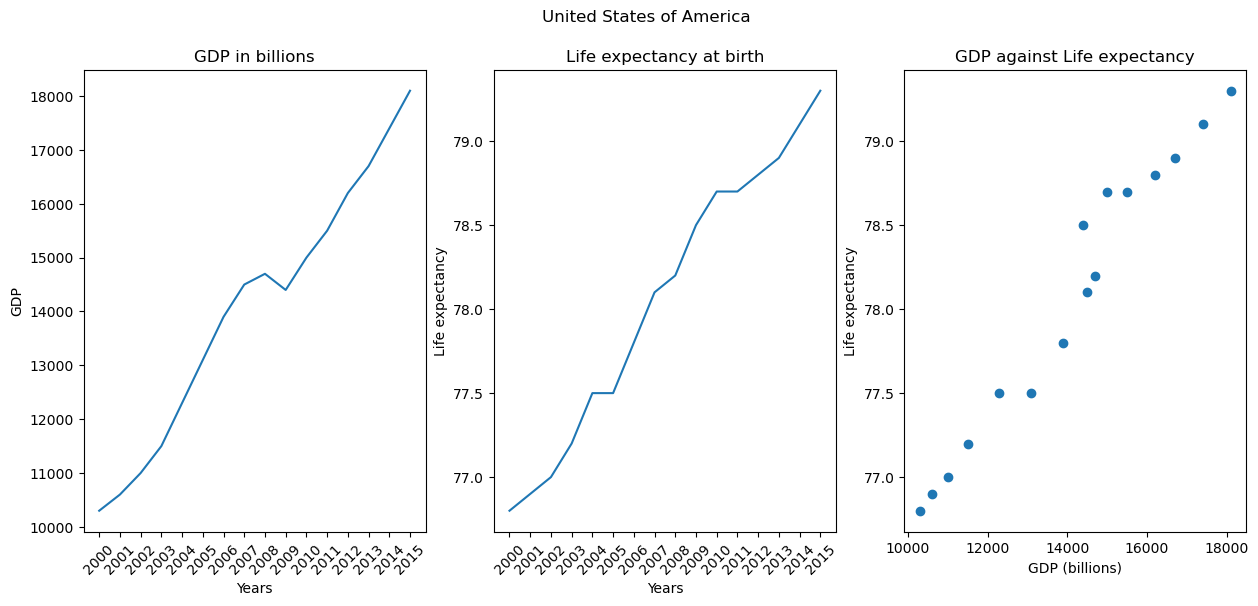

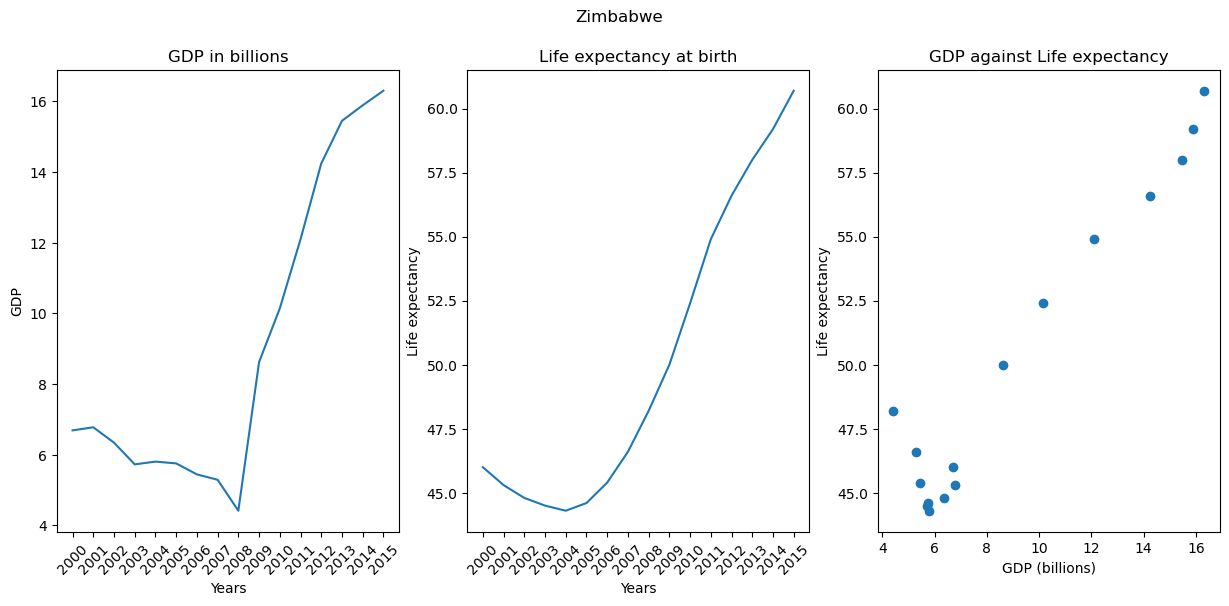

In [12]:
datasets = [Chile, China, Germany, Mexico, USA, Zimbabwe]
for set in datasets:
    figure, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,6))
    ax1.plot(set.Year, (set.GDP/1000000000))
    ax2.plot(set.Year, (set['LEAB']))
    ax3.scatter(set.GDP/1000000000, (set['LEAB']))
    figure.suptitle('{}'.format(set.Country[0]))
    ax1.set_title('GDP in billions')
    ax1.set_ylabel('GDP')
    ax2.set_ylabel('Life expectancy')
    ax2.set_title('Life expectancy at birth')
    ax1.set_xticks(list(range(2000,2016)))
    ax1.set_xticklabels(list(set.Year.unique()), rotation=45)
    ax1.set_xlabel('Years')
    ax2.set_xlabel('Years')
    ax2.set_xticks(list(range(2000,2016)))
    ax2.set_xticklabels(list(set.Year.unique()), rotation=45)
    ax3.set_title('GDP against Life expectancy')
    ax3.set_ylabel('Life expectancy')
    ax3.set_xlabel('GDP (billions)')
    plt.show()
    #plt.clf()

Looking at these graphs, there maybe more correlation between GDP and life expectancy for the individual countries. All countries have a clear positive line between GDP and life expectancy. There are also clear similarities between the patterns of the line graphs. 

### Correlation coefficients

Let's investigate further whether there is a correlation between Life expectancy at birth and GDP. 

Looking at the whole dataset;

In [13]:
c_data = pd.DataFrame(data, columns=['Life expectancy at birth (years)', 'GDP'])
coefficient = c_data.corr()
'Correlation matrix', coefficient

('Correlation matrix',
                                   Life expectancy at birth (years)  GDP
 Life expectancy at birth (years)                               NaN  NaN
 GDP                                                            NaN  1.0)

We can now see that we have a coefficient of 0.34 between Life expectancy at birth and GDP across all six countries. Meaning that there is only a correlation of 34% which is relatively weak. However, looking at our line graphs of individual countries, let's calculate the coefficient for each country.

Starting with the United States of America;

In [14]:
c_USA = pd.DataFrame(USA, columns=['LEAB', 'GDP'])
coefficient = c_USA.corr()
'Correlation matrix for USA', coefficient

('Correlation matrix for USA',
           LEAB       GDP
 LEAB  1.000000  0.981709
 GDP   0.981709  1.000000)

With a coefficient of 0.9817. There is a very high correlation in the USA between GDP and life expectancy.
Let's look at the other countries;

In [15]:
c_China = pd.DataFrame(China, columns=['LEAB', 'GDP'])
c_China = c_China.corr()['GDP'][0]

c_Chile = pd.DataFrame(Chile, columns=['LEAB', 'GDP'])
c_Chile = c_Chile.corr()['GDP'][0]

c_Germany = pd.DataFrame(Germany, columns=['LEAB', 'GDP'])
c_Germany = c_Germany.corr()['GDP'][0]

c_Zimbabwe = pd.DataFrame(Zimbabwe, columns=['LEAB', 'GDP'])
c_Zimbabwe = c_Zimbabwe.corr()['GDP'][0]

c_Mexico = pd.DataFrame(Mexico, columns=['LEAB', 'GDP'])
c_Mexico = c_Mexico.corr()['GDP'][0]

countries = ['China', 'Chile', 'Germany', 'Zimbabwe', 'Mexico']
coefficients = [c_China, c_Chile, c_Germany, c_Zimbabwe, c_Mexico]

#Putting our coeffients into a dataframe for visualisation
arr = {'Country': [], 'Coefficient': []}
for i in range(0, len(countries)):
    arr['Country'].append(countries[i])
    arr['Coefficient'].append(coefficients[i])

co_table = pd.DataFrame(data=arr, index=range(0, len(countries)))
co_table

,Country,Coefficient
0,China,0.908526
1,Chile,0.949877
2,Germany,0.932699
3,Zimbabwe,0.966200
4,Mexico,0.932238


All coefficients per Country are in the top 10%. This tells me that for an individual country within the data, there is a strong correlation between GDP and Life expectancy. 

## Conclusion

Having been given data across six countries, Zimbabwe, USA, Mexico, China, Chile and Gremany and the average value for each year between 2000 and 2015. We have found that Zimbabwe has the average lowest GDP and Life expectancy rates. Also, Germany has the highest average life expectancy whilst USA has the highest average GDP.

Since the values for each country of GDP and Life expectancy differ so much, overall, there is not a strong correlation between the two categories. However, we have found a strong correlation within each country between GDP and Life expectancy at birth implying that the higher the countries GDP, the higher the life expectancy is of it's citizens.

To explore this further we could to look at other factors such as environmental and lifestyle.

#### Data Source:

Data downloaded from Codecadamy Data Analysis Course which stated they were originally from;

GDP Source: World Bank national accounts data, and OECD National Accounts data files.

Life expectancy Data Source: World Health Organization